In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.optimizers import Adam
import keras

In [4]:
cifar_train=pd.read_csv('train_data.csv')
x_train=cifar_train.drop('label',axis=1).values
y_train=cifar_train['label'].values

print(x_train.shape)
print(y_train.shape)

(50000, 3072)
(50000,)


In [5]:
cifar_test=pd.read_csv('test_data.csv')
x_test=cifar_test.drop('label',axis=1).values
y_test=cifar_test['label'].values

print(x_test.shape)
print(y_test.shape)

(10000, 3072)
(10000,)


In [6]:
x_train=x_train.reshape((-1,32,32,3))
x_train.astype('float32')/255.0

x_test=x_test.reshape((-1,32,32,3))
x_test.astype('float32')/255.0

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [8]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923914 (3.52 MB)
Trainable params: 923914 (3.52 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
H=model.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
391/391 [==============================] - 31s 74ms/step - loss: 9.3456 - accuracy: 0.1797
Epoch 2/5
391/391 [==============================] - 29s 73ms/step - loss: 1.7607 - accuracy: 0.3576
Epoch 3/5
391/391 [==============================] - 28s 72ms/step - loss: 1.5313 - accuracy: 0.4465
Epoch 4/5
391/391 [==============================] - 28s 72ms/step - loss: 1.3744 - accuracy: 0.5070
Epoch 5/5
391/391 [==============================] - 29s 73ms/step - loss: 1.2522 - accuracy: 0.5521


In [10]:
score=model.evaluate(x_test,y_test)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

313/313 [==============================] - 4s 12ms/step - loss: 1.4806 - accuracy: 0.4924
Loss:  1.480601191520691
Accuracy:  0.49239999055862427


313/313 [==============================] - 4s 12ms/step
Actual Label:  1
Predicted Label:  1


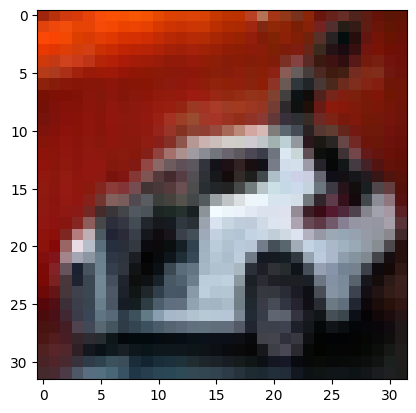

In [14]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

n=6
plt.imshow(x_test[n].reshape(32,32,3))

predictions=model.predict(x_test)

print("Actual Label: ",np.argmax(y_test[n]))
print("Predicted Label: ",np.argmax(predictions[n]))